# 1. Calentando motores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

# 1.

df = pd.read_csv('http://pilas.exp.dc.uba.ar/datos/alturas/alturas_500_1.csv')
#df = pd.read_csv('/content/alturas_n_1000_id346.csv')  # Usando 1000 datos de la página del final de la consigna con id = 346.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 2.

print('Las variables del archivo de datos son ')
df.columns

Las variables del archivo de datos son 


Index(['altura', 'genero', 'contextura_madre', 'altura_madre'], dtype='object')

In [3]:
# 3.

print('Hay ', df.shape[0], ' individuos en el conjunto de observaciones.')

Hay  500  individuos en el conjunto de observaciones.


In [4]:
# 4.

print('La altura promedio de los individuos es ', int(round(df['altura'].mean(), 0)), ' cm.')
print('Este número podría usarse para estimar por donde podría andar la altura del futuro hijo.')

La altura promedio de los individuos es  166  cm.
Este número podría usarse para estimar por donde podría andar la altura del futuro hijo.


In [5]:
# 5.

filtroM = df['genero'] == 'M'
promM = round(df[filtroM]['altura'].mean(), 0)
print('Podría usarse el promedio de alturas de los individuos de genero masculino (', int(promM) , 'cm).')

Podría usarse el promedio de alturas de los individuos de genero masculino ( 172 cm).


In [6]:
# 6.

filtroBajita = df['contextura_madre'] == 'bajita'
promMB = round(df[filtroM & filtroBajita]['altura'].mean(), 0)
print('Podría usarse el promedio de alturas de los individuos de genero masculino y madre bajita (', int(promMB) , 'cm).')

Podría usarse el promedio de alturas de los individuos de genero masculino y madre bajita ( 170 cm).


# 2. Vamos ahora a considerar la altura de la mamá

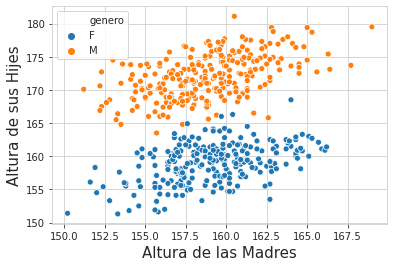

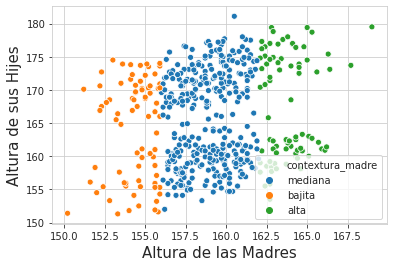

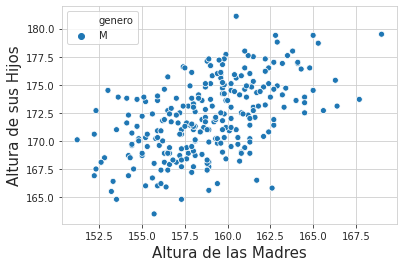

In [7]:
# 7.

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.scatterplot(data=df, x='altura_madre', y='altura', hue='genero')
    plt.xlabel(xlabel='Altura de las Madres', fontsize=15)
    plt.ylabel(ylabel='Altura de sus Hijes', fontsize=15)
    plt.show()
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.scatterplot(data=df, x='altura_madre', y='altura', hue='contextura_madre')
    plt.xlabel(xlabel='Altura de las Madres', fontsize=15)
    plt.ylabel(ylabel='Altura de sus Hijes', fontsize=15)
    plt.show()
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.scatterplot(data=df[filtroM], x='altura_madre', y='altura', hue='genero')
    plt.xlabel(xlabel='Altura de las Madres', fontsize=15)
    plt.ylabel(ylabel='Altura de sus Hijos', fontsize=15)
    plt.show()

In [8]:
# 8.

caso8 = df[(df['altura_madre'] == 156.5) & filtroM]
print('Hay ', caso8.shape[0], ' madres que miden 156.5 cm con un hijo varón')

Hay  5  madres que miden 156.5 cm con un hijo varón


In [9]:
def acotarpromedio(x, h):
    filtrotecho = df['altura_madre'] <= x + h
    filtropiso = df['altura_madre'] >= x - h
    print('Hay ', df[filtroM & filtropiso & filtrotecho].shape[0], ' casos donde la madre tiene una altura entre ',
          x - h,' cm y ', x + h, ' cm')
    promacotado = round(df[filtroM & filtropiso & filtrotecho]['altura'].mean(), 0)
    print('El promedio de la altura de sus hijos es de ', promacotado, ' cm.')

In [10]:
# 9.

acotarpromedio(x=156.5, h=1)

Hay  50  casos donde la madre tiene una altura entre  155.5  cm y  157.5  cm
El promedio de la altura de sus hijos es de  170.0  cm.


In [11]:
# 10.

acotarpromedio(x=156.5, h=2)

Hay  97  casos donde la madre tiene una altura entre  154.5  cm y  158.5  cm
El promedio de la altura de sus hijos es de  171.0  cm.


In [12]:
# 11.

acotarpromedio(x=159.5, h=1)
acotarpromedio(x=159.5, h=2)

Hay  70  casos donde la madre tiene una altura entre  158.5  cm y  160.5  cm
El promedio de la altura de sus hijos es de  173.0  cm.
Hay  130  casos donde la madre tiene una altura entre  157.5  cm y  161.5  cm
El promedio de la altura de sus hijos es de  172.0  cm.


# 3. Implementando funciones

In [13]:
# 12.

def predigo_promedio_movil(X, Y, x_nuevo, ventana):
    filtrotecho = X <= x_nuevo + ventana
    filtropiso = X >= x_nuevo - ventana
    promacotado = Y[filtropiso & filtrotecho].mean()
    return promacotado

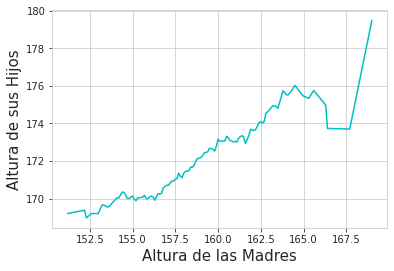

In [14]:
# 13.

x = np.sort(df[filtroM]['altura_madre'].unique())
y = []
for i in x:
    y.append(predigo_promedio_movil(df[filtroM]['altura_madre'], df[filtroM]['altura'], i, 1))
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    plt.plot(x, y, '-c')
    plt.xlabel(xlabel='Altura de las Madres', fontsize=15)
    plt.ylabel(ylabel='Altura de sus Hijos', fontsize=15)
    plt.show()


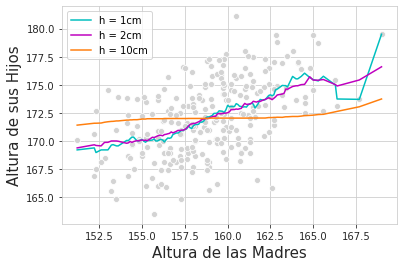

In [15]:
# 14, 15.

x = np.sort(df[filtroM]['altura_madre'].unique())
color = ['c', 'm', mcolors.TABLEAU_COLORS['tab:orange']]
c = 0
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.scatterplot(x='altura_madre', y='altura', data=df[filtroM], color=mcolors.CSS4_COLORS['lightgray'])
for h in {1, 2, 10}:
    y = []
    for i in x:
        y.append(predigo_promedio_movil(df[filtroM]['altura_madre'], df[filtroM]['altura'], i, h))
    plt.plot(x, y, color[c], label=('h = ' + str(h) + 'cm'))
    c += 1
plt.legend(loc='upper left')
plt.xlabel(xlabel='Altura de las Madres', fontsize=15)
plt.ylabel(ylabel='Altura de sus Hijos', fontsize=15)
plt.show()

# 4. Por si fuera poco

In [31]:
# 16.

def distancia(x, y):
    return abs(x - y)

def predigo_promedio_vecinos(X, Y, x_nuevo, k):
    tabla = pd.DataFrame()
    tabla['X'] = X
    tabla['Y'] = Y
    tabla['distancia'] = X.apply(distancia, args=(x_nuevo, ))
    tabla = tabla.sort_values('distancia')
    vecinos = tabla.iloc[:k]
    return vecinos['Y'].mean()

# 5. Cuadrados mínimos

In [32]:
# 17.

def cuadrados_minimos(X, Y):
    n = len(X)
    x = X.mean()
    y = Y.mean()
    numer = 0
    denom = 0
    for i in range(n):
        numer += (X.iloc[i] - x) * (Y.iloc[i] - y)
        denom += (X.iloc[i] - x)**2
    m = numer / denom
    b = y - m*x
    return m, b

cuadrados_minimos(df[filtroM]['altura_madre'], df[filtroM]['altura'])

(0.5439411867127304, 85.63524409205564)

In [33]:
# 18.

def predigo_con_cuadrados_minimos(X, Y, x_nuevo):
    m, b = cuadrados_minimos(X, Y)
    return m*x_nuevo + b

print('Usando la recta de cuadrados mínimos, predecimos una altura de ', round(predigo_con_cuadrados_minimos(df[filtroM]['altura_madre'], df[filtroM]['altura'], 156.5), 2), 'cm')
print('para el hijo varón de una madre que mide 156.5 cm.')

Usando la recta de cuadrados mínimos, predecimos una altura de  170.76 cm
para el hijo varón de una madre que mide 156.5 cm.


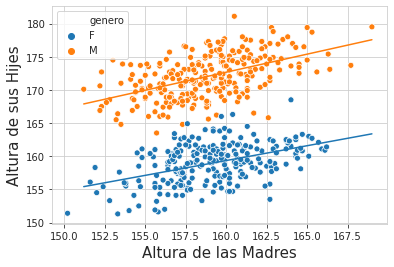

Estas rectas de cuadrados mínimos coinciden con los ploteados automaticamente por la función lmplot de Seaborn.


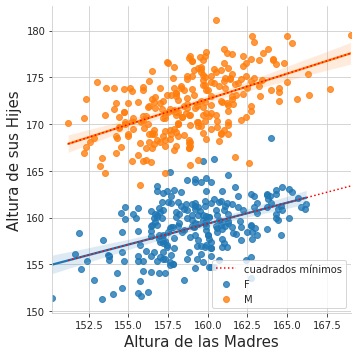

In [34]:
# 19.

with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.scatterplot(data=df, x='altura_madre', y='altura', hue='genero')

x = np.sort(df[filtroM]['altura_madre'].unique())
yM = []
yF = []
for i in x:
    yM.append(predigo_con_cuadrados_minimos(df[filtroM]['altura_madre'], df[filtroM]['altura'], i))
    yF.append(predigo_con_cuadrados_minimos(df[~(filtroM)]['altura_madre'], df[~(filtroM)]['altura'], i))
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    plt.plot(x, yF)
    plt.plot(x, yM)
plt.xlabel(xlabel='Altura de las Madres', fontsize=15)
plt.ylabel(ylabel='Altura de sus Hijes', fontsize=15)
plt.show()
print('Estas rectas de cuadrados mínimos coinciden con los ploteados automaticamente por la función lmplot de Seaborn.')
with sns.axes_style('whitegrid', {'ytick.left': True, 'xtick.bottom': True}):
    sns.lmplot(data=df, x='altura_madre', y='altura', hue='genero', legend=False)
    plt.plot(x, yF, ':r')
    plt.plot(x, yM, ':r', label='cuadrados mínimos')
    plt.xlabel(xlabel='Altura de las Madres', fontsize=15)
    plt.ylabel(ylabel='Altura de sus Hijes', fontsize=15)
    plt.legend(loc='lower right')

In [35]:
from scipy import stats
slope_masculino, intercept, r, p, std_err = stats.linregress(df[filtroM]['altura_madre'], df[filtroM]['altura'])
print("El valor de la pendiente de la recta de minimos cuadadros para hijes masculinos es",slope_masculino)

El valor de la pendiente de la recta de minimos cuadadros para hijes masculinos es 0.5439411867127302


In [36]:
j = 0
while (round(slope_masculino, j) ==
       round(cuadrados_minimos(df[filtroM]['altura_madre'], df[filtroM]['altura'])[0], j)):
    j += 1
print('El metodo propuesto por la guía usando scipy coincide con el hayado en la función "cuadrados minimos"')
print('hasta la ' + str(j) + 'ª cifra decimal.')

El metodo propuesto por la guía usando scipy coincide con el hayado en la función "cuadrados minimos"
hasta la 16ª cifra decimal.
